## Name: Agrawal Nidhi
## Student id: 21-717-673

<br>

In [1]:
import networkx as nx
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt


### Method below computes and returns a dictionary of centralities of nodes in the network.<br>

In [2]:
def centralities(graph):
    
    # degree_cen is the list of degree centrality of all nodes in the network
    degree_cen = nx.degree_centrality(graph).values()

    # between_cen is the list of betweenness centrality of all nodes in the network
    between_cen = nx.betweenness_centrality(graph).values()

    # close_cen is the list of closeness centrality of all nodes in the network
    close_cen = nx.closeness_centrality(graph).values()

    # eigen_cen is the list of eigenvector centrality of all nodes in the network
    eigen_cen = nx.eigenvector_centrality(graph).values()
    
    # creating a dictionary with 'centrality name' as key and 'list of centrality of all nodes' as value
    centrality_dict = {"Degree Centrality" : degree_cen, "Betweenness Centrality" : between_cen, 
                       "Closeness Centrality" : close_cen, "Eigenvector Centrality" : eigen_cen}
    
    return(centrality_dict)


### Method below computes correlation coefficients between a pair of centralities and sets their legend for plots.<br>

In [3]:

# Compute the correlation coefficients between each pair of centralities
def coeff(centrality1, centrality2):
    
    centrality1 = list(centrality1)                                # convert the centrality values into a list
    centrality2 = list(centrality2)
    
    pearson = round(sp.pearsonr(centrality1,centrality2)[0],3)     # calculate pearson's coefficient
    kendall = round(sp.kendalltau(centrality1,centrality2)[0],3)   # calculate kendall's coefficient
    spearman = round(sp.spearmanr(centrality1,centrality2)[0],3)   # calculate spearman's coefficient
    
    # Set legend for Pearson's, Kendall's and Spearman's coefficient for the plots in methods below
    plt.plot([],label = "Pearson's Coeff: {}".format(pearson))
    plt.plot([],label = "Kendall's Coeff: {}".format(kendall))
    plt.plot([],label = "Spearman's Coeff: {}".format(spearman))
    plt.legend()


### Method below makes a scatter plot for each pair of centralities<br>

In [4]:

def centralitiesPlot(graph, filename):
    
    centrality_dict = centralities(graph) # calling method to return dictionary of centralities
    donelist = list()  
    
    # Loop to plot centralities against each other
    for name1, centrality1 in centrality_dict.items():
        for name2, centrality2 in centrality_dict.items():
            if name1 != name2 and name2 not in donelist:
                
                # calling method to compute the correlation coefficients between each pair of centralities
                # and set their legend for the plot below
                coeff(centrality1, centrality2)
                
                plt.scatter(centrality1,centrality2)      # Scatter plot between each pair of centralities
                plt.xlabel(name1, fontsize = 15)          # Set label for x axis
                plt.ylabel(name2, fontsize = 15)          # Set label for y axis
                plt.title(filename, fontsize = 15)        # Set title of the graph
                plt.show()                                # Display graph
                
                donelist.append(name1)                    # Append centrality to the list to avoid repetition
                 
                print("\n\n")
                

### Method below randomizes the network and makes a scatter plot of each centrality before vs. after randomisation<br>


In [5]:

def centralities_realRand(graph, filename):
    
    # Randomize the network
    grnd_graph = nx.algorithms.smallworld.random_reference(graph, niter = 10, connectivity=False)
    
    centrality_real_dict = centralities(graph)     # get dictionary of centralities of real network
    centrality_rnd_dict = centralities(grnd_graph) # get dictionary of centralities of randomized network

    # loop to make scatter plot of each centrality before vs. after randomisation
    for name_real, centrality_real in centrality_real_dict.items():
        for name_rnd, centrality_rnd in centrality_rnd_dict.items():
            if name_real == name_rnd:
                
                # calling method to compute the correlation coefficients between centralities of 
                # real and randomized network and set their legend for the plot below
                coeff(centrality_real, centrality_rnd)
                
                # Scatter plot between centralities of real and randomized network
                plt.scatter(centrality_real,centrality_rnd)
                plt.xlabel("Real Network", fontsize = 15)                    # Set label for x axis
                plt.ylabel("Randomized Network", fontsize = 15)              # Set label for y axis
                plt.title(filename + ": " + name_real, fontsize = 15)        # Set title of the graph
                plt.show()                                                   # Display graph
                
                print("\n\n")

                

## Explanation of Jazz Collaboration Network centralities:
<u>Nodes:</u> Jazz musicians<br>
<u>Edges:</u> Collaborations in bands that performed between 1912 and 1940

<u>Degree centrality:</u> If a musician has high degree centrality then it implies that the musician was quite popular and had many performances with other musicians. 

<u>Closeness centrality:</u> If a musician has high closeness centrality then it implies that the musician could easily reach out and connect/collaborate with other musicians.

<u>Betweenness centrality:</u> If a musician has high betweenness centrality then it implies that the musician could influence the network by controlling the flow of information. The musician was very influential and could help other musicians connect and perform together or on the contrary could stop other musicians from connecting with each other.

So,if a musician has high degree centrality and low betweenness centrality then it implies that the musician was popular but not very influential.

<u>Eigenvector centrality:</u> If a musician has high eigenvector centrality then it implies that the musician had collaborated with other important and influential musicians. 

<br><br>


## Dataset: Jazz Collaboration Network
- computing centralities of nodes in the network
- making a scatter plot for each pair of centralities
- calculating the correlation coefficients for each pair of centralities<br>

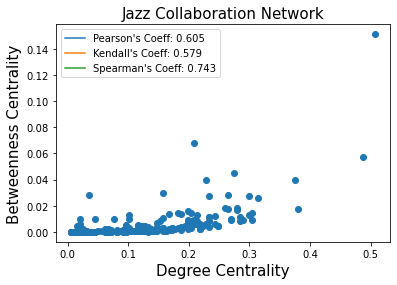

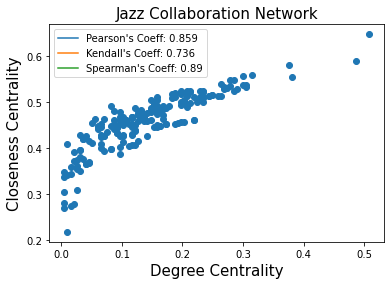

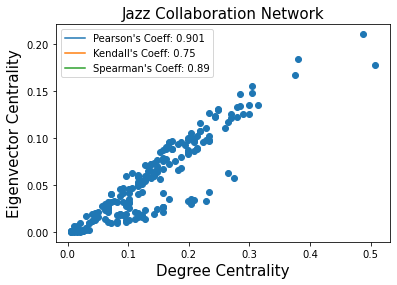

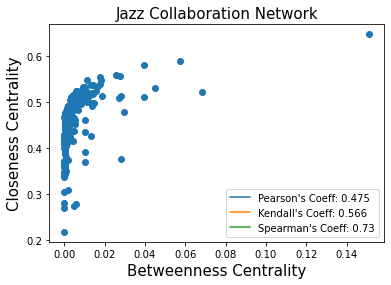

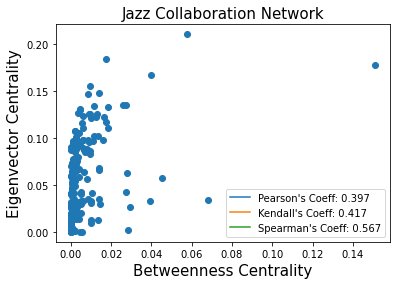

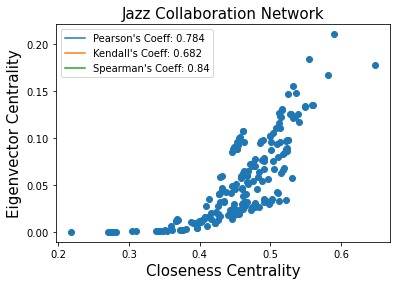

In [7]:

graph_jazz_collab = nx.read_gml("Data/graph_jazz_collab.gml")  # Read dataset

# call method to compute centralities and make scatter plots between each pair of centralities
centralitiesPlot(graph_jazz_collab, "Jazz Collaboration Network") 


## Randomizing the dataset: Jazz Collaboration Network
- computing centralities of nodes in the real and randomized network
- plotting a scatter plot of each centrality before vs. after randomisation
- computing the corresponding correlation coefficients<br>

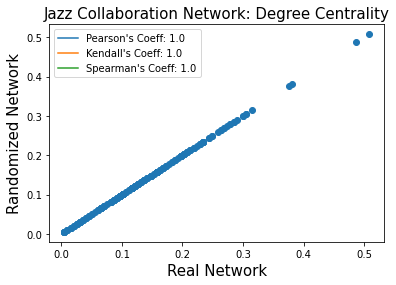

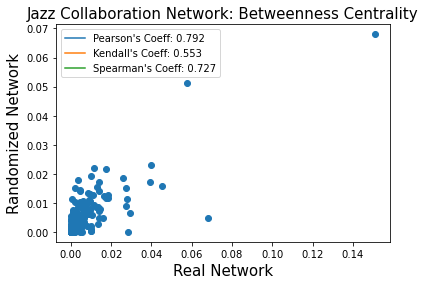

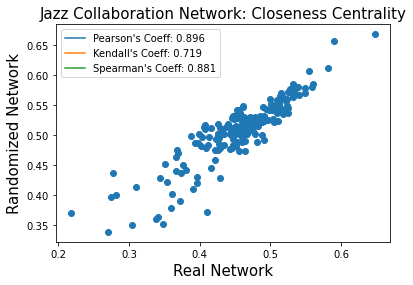

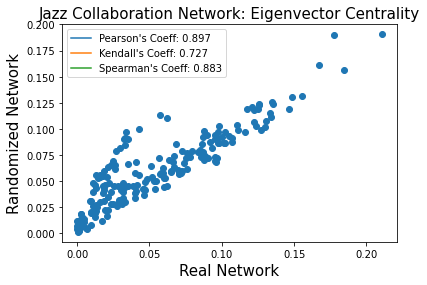

In [8]:

centralities_realRand(graph_jazz_collab, "Jazz Collaboration Network")


### Degree centrality for real and randomized network is same because the degree distriubution is not changed by randomization. Therefore x=y in the plot: degree centrality of randomized versus real network. <br><br><br><br>

## Dataset: Political Blogs Network

- computing centralities of nodes in the network
- making a scatter plot for each pair of centralities
- calculating the correlation coefficients for each pair of centralities<br>

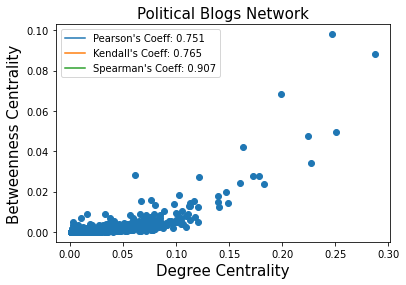

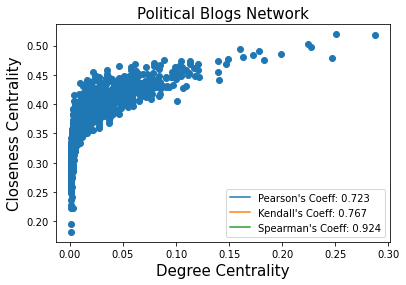

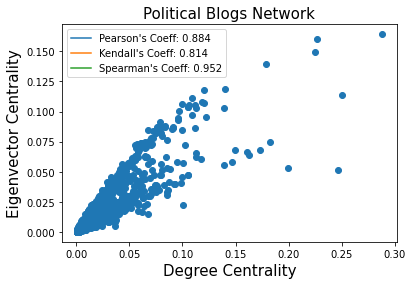

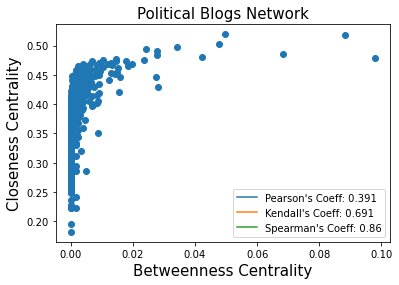

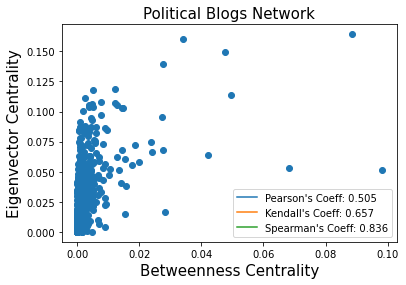

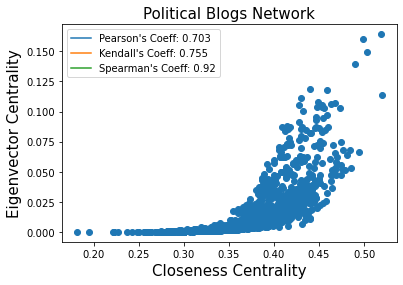

In [9]:

graph_polblog = nx.read_gml("Data/graph_polblog.gml")  # Read dataset

# call method to compute centralities and make scatter plots between each pair of centralities
centralitiesPlot(graph_polblog, "Political Blogs Network") 


## Randomizing the dataset: Political Blogs Network

- computing centralities of nodes in the real and randomized network
- plotting a scatter plot of each centrality before vs. after randomisation
- computing the corresponding correlation coefficients

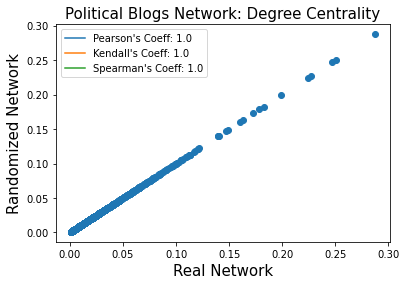

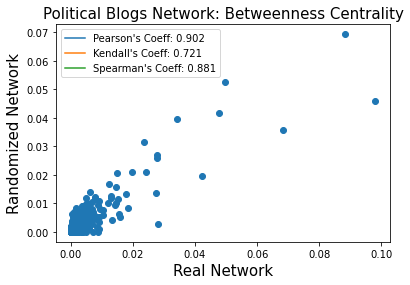

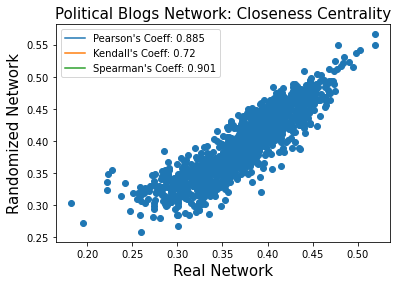

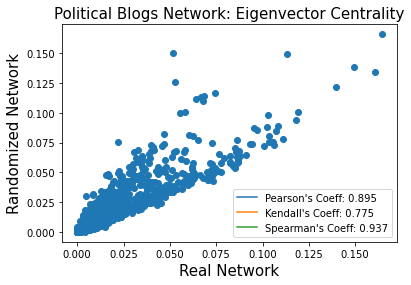

In [10]:

centralities_realRand(graph_polblog, "Political Blogs Network")


### Degree centrality for real and randomized network is same because the degree distriubution is not changed by randomization. Therefore x=y in the plot: degree centrality of randomized versus real network. <br><br><br><br>

## Dataset: 9-11 Terrorists Network

- computing centralities of nodes in the network
- making a scatter plot for each pair of centralities
- calculating the correlation coefficients for each pair of centralities<br>

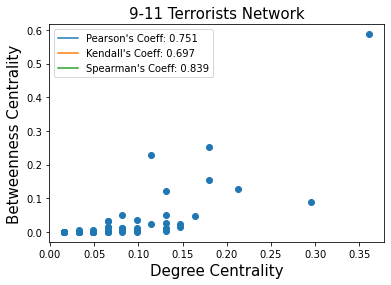

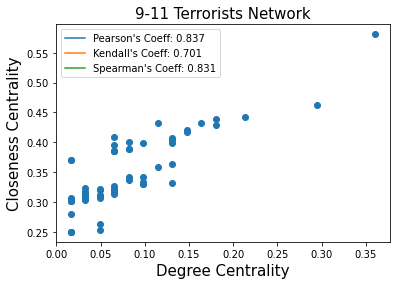

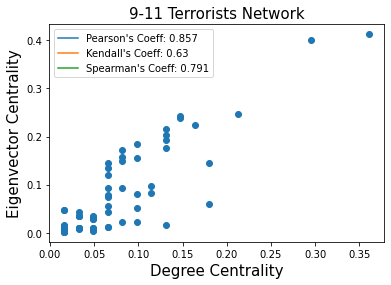

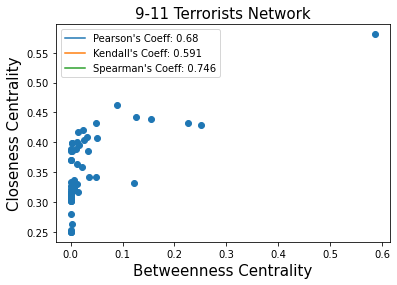

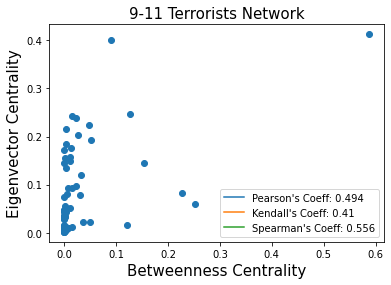

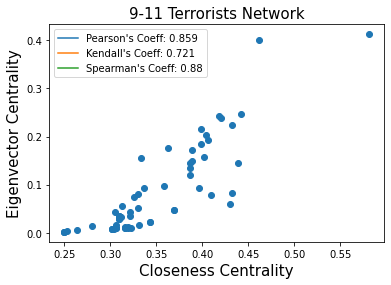

In [11]:

graph_terrorists = nx.read_gml("Data/graph_terrorists.gml") # Read dataset

# call method to compute centralities and make scatter plots between each pair of centralities
centralitiesPlot(graph_terrorists, "9-11 Terrorists Network")


## Randomizing the dataset: 9-11 Terrorists Network

- computing centralities of nodes in the real and randomized network
- plotting a scatter plot of each centrality before vs. after randomisation
- computing the corresponding correlation coefficients

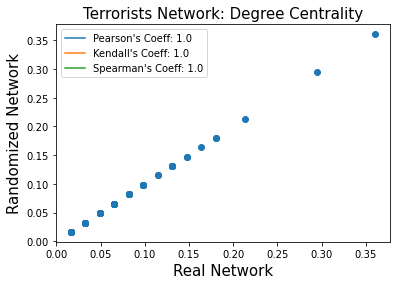

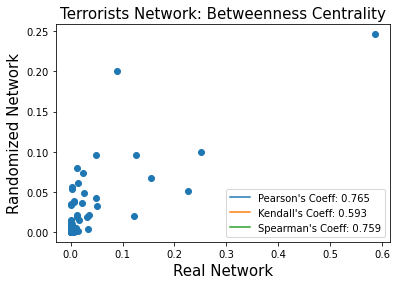

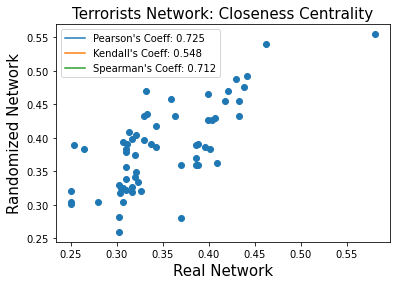

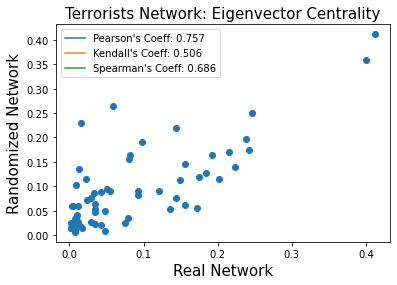

In [12]:

centralities_realRand(graph_terrorists, "Terrorists Network")


### Degree centrality for real and randomized network is same because the degree distriubution is not changed by randomization. Therefore x=y in the plot: degree centrality of randomized versus real network. <br><br><br><br>

## <br>Dataset: Florida Foodweb Network<br><br>

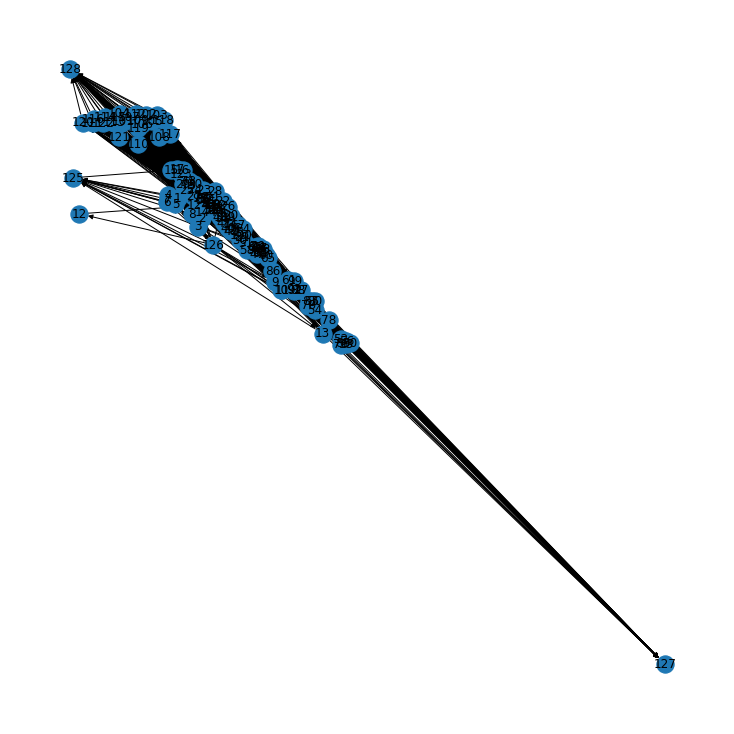

In [13]:
Florida_foodweb = nx.read_graphml("Data/Florida_foodweb.graphml") # Read dataset
plt.figure(figsize=(10,10))                                       # Set figure size for better visualization
nx.draw(Florida_foodweb, with_labels = True)                      # Pictorial representation of network



Most important node (one with highest rank) is:  128 




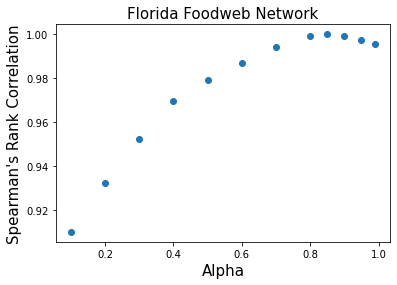

In [14]:

alphaList = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]   # List of alpha values

# Calculate pagerank for alpha = 0.85
pr85 = nx.pagerank(Florida_foodweb, alpha=0.85) # pr85 is dictionary of nodes as keys and their PageRank as values

max_key = max(pr85, key=pr85.get)               # get node id which has maximum page rank
print('\n\nMost important node (one with highest rank) is: ', max_key, '\n\n')

pr85_list = list(pr85.values())                 # list of pageranks for alpha = 0.85
spearmanList = list()

for i in alphaList: 
    pr = nx.pagerank(Florida_foodweb, alpha=i)  # pr is dictionary of nodes as keys and their PageRank as values
    pr_list = list(pr.values())                 # list of pageranks
    
    # calculate Spearman correlation coefficient between PageRanks for alpha = 0.85 and all other alphas
    spearman = sp.spearmanr(pr85_list,pr_list)[0]
    
    spearmanList.append(spearman)               # list of spearman coefficients


plt.scatter(alphaList, spearmanList)                       # Scatter plot: Spearman's Correlation Coeff Vs Alpha
plt.xlabel("Alpha", fontsize = 15)                         # Set label for x axis
plt.ylabel("Spearman's Rank Correlation", fontsize = 15)   # Set label for y axis
plt.title("Florida Foodweb Network", fontsize = 15)        # Set title of the graph
plt.show()                                                 # Display graph

print("\n\n")
    

## Merci !